# Alura+ONE Challenge 2: Alura Store

## Análise de Dados

### Importação de dados



In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

lojas = [loja1, loja2, loja3, loja4]
lojas_str = [ f"Loja {n}" for n in range(1, 5) ]

In [3]:
loja1

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38
...,...,...,...,...,...,...,...,...,...,...,...,...
2354,Celular Plus X42,eletronicos,1712.54,88.772042,15/11/2021,Thiago Silva,RJ,1,boleto,1,-22.25,-42.66
2355,Impressora,eletronicos,377.02,20.363958,18/03/2023,Lucas Oliveira,SP,5,boleto,1,-22.19,-48.79
2356,Jogo de tabuleiro,brinquedos,163.82,9.611337,06/07/2021,Lucas Oliveira,PR,5,cartao_credito,4,-24.89,-51.55
2357,Cama box,moveis,921.77,46.665919,02/05/2022,Pedro Gomes,RN,1,cartao_credito,2,-5.81,-36.59


In [4]:
print([len(loja) for loja in lojas])

[2359, 2359, 2359, 2358]


In [5]:
print(loja1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Produto                 2359 non-null   object 
 1   Categoria do Produto    2359 non-null   object 
 2   Preço                   2359 non-null   float64
 3   Frete                   2359 non-null   float64
 4   Data da Compra          2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Local da compra         2359 non-null   object 
 7   Avaliação da compra     2359 non-null   int64  
 8   Tipo de pagamento       2359 non-null   object 
 9   Quantidade de parcelas  2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB
None


### 1\. Análise do faturamento


In [6]:
faturamentos = [ loja['Preço'].sum() for loja in lojas ]
faturamento_total = sum(faturamentos)

print( "Faturamentos:\n{}".format( ("\n".join( ( f'Loja {n}: R$ {val:_.2f}' for n,val in enumerate(faturamentos,start=1) ) )).replace(".",",").replace("_",".") ) )

print(f"\nTotal : R$ {faturamento_total:_.2f}".replace(".",",").replace("_","."))

Faturamentos:
Loja 1: R$ 1.534.509,12
Loja 2: R$ 1.488.459,06
Loja 3: R$ 1.464.025,03
Loja 4: R$ 1.384.497,58

Total : R$ 5.871.490,79


In [7]:
print( "Porcentagem do faturamentos:\n{}".format( ("\n".join( ( f'{loja_s}: {val/faturamento_total :.1%}' for loja_s,val in zip(lojas_str,faturamentos) ) )) ) )

Porcentagem do faturamentos:
Loja 1: 26.1%
Loja 2: 25.4%
Loja 3: 24.9%
Loja 4: 23.6%


### 2\. Vendas por Categoria


In [8]:
# loja1[ ['Categoria do Produto','Preço'] ].groupby("Categoria do Produto").describe()
# loja1[ ['Categoria do Produto','Preço'] ].groupby("Categoria do Produto").count()

In [9]:
vendas_pCategoria = pd.concat([ loja[ ['Categoria do Produto','Produto'] ].groupby("Categoria do Produto").count().rename(columns={'Produto':f"Loja {n}"}) for n,loja in enumerate(lojas,start=1) ], axis=1)

print("Vendas de cada loja, por categoria:\n")
vendas_pCategoria

Vendas de cada loja, por categoria:



,Loja 1,Loja 2,Loja 3,Loja 4
Categoria do Produto,,,,
brinquedos,324,313,315,338
eletrodomesticos,312,305,278,254
eletronicos,448,422,451,451
esporte e lazer,284,275,277,277
instrumentos musicais,182,224,177,170
livros,173,197,185,187
moveis,465,442,499,480
utilidades domesticas,171,181,177,201


### 3\. Média de Avaliação das Lojas

In [10]:
avaliacao_media = pd.DataFrame(
    ((loja['Avaliação da compra'].mean(),loja['Avaliação da compra'].std()) for loja in lojas ),
    index=lojas_str,
    columns="media dp".split(),
)

# print( "Avaliação:\n{}".format( "\n".join( f"{loja:s}:  Média={media:.2f}  Desvio Padrão={dp:.2f}" for loja,media,dp in zip(avaliacao_media.index,avaliacao_media['media'],avaliacao_media['dp']) ) ) )
print( "Avaliação:")
avaliacao_media

Avaliação:


,media,dp
Loja 1,3.976685,1.415370
Loja 2,4.037304,1.356153
Loja 3,4.048326,1.386426
Loja 4,3.995759,1.403063


### 4\. Produtos Mais e Menos Vendidos

In [11]:
produtos_nVendas = pd.concat([ loja[['Produto','Preço']].groupby("Produto").count().rename(columns={'Preço':f"Loja {n}"}) for n,loja in enumerate(lojas,start=1) ], axis=1)
produtos_nVendas["Total"] = produtos_nVendas.sum(axis=1)
produtos_nVendas.head(20).tail(10)

,Loja 1,Loja 2,Loja 3,Loja 4,Total
Produto,,,,,
Carrinho controle remoto,52,47,52,55,206
Celular ABXY,33,41,44,39,157
Celular Plus X42,49,55,46,48,198
Ciência de dados com python,39,43,46,38,166
Copo térmico,54,47,38,48,187
Corda de pular,40,50,53,43,186
Cubo mágico 8x8,44,45,44,47,180
Cômoda,56,44,55,55,210
Dashboards com Power BI,42,43,40,56,181


In [12]:
produto_maiorNumVendas = {loja:produtos_nVendas[loja].max() for loja in produtos_nVendas}
produtos_maisVendidos = { loja:list(produtos_nVendas[loja][ produtos_nVendas[loja] == produto_maiorNumVendas[loja] ].index) for loja in produtos_nVendas }

print("Produto(s) mais vendidos, por loja:")
print("\n".join(f"{loja :6s}: vendas={produto_maiorNumVendas[loja] :3d}  produto(s)={produtos_maisVendidos[loja]}" for loja in produtos_maisVendidos.keys()))

Produto(s) mais vendidos, por loja:
Loja 1: vendas= 60  produto(s)=['Guarda roupas', 'Micro-ondas', 'TV Led UHD 4K']
Loja 2: vendas= 65  produto(s)=['Iniciando em programação']
Loja 3: vendas= 57  produto(s)=['Kit banquetas']
Loja 4: vendas= 62  produto(s)=['Cama box']
Total : vendas=210  produto(s)=['Cômoda']


In [13]:
produto_menorNumVendas = {loja:produtos_nVendas[loja].min() for loja in produtos_nVendas}
produtos_menosVendidos = { loja:list(produtos_nVendas[loja][ produtos_nVendas[loja] == produto_menorNumVendas[loja] ].index) for loja in produtos_nVendas }

print("Produto(s) menos vendidos, por loja:")
print("\n".join(f"{loja :6s}: vendas={produto_menorNumVendas[loja] :3d}  produto(s)={produtos_menosVendidos[loja]}" for loja in produtos_menosVendidos.keys()))

Produto(s) menos vendidos, por loja:
Loja 1: vendas= 33  produto(s)=['Celular ABXY', 'Headset']
Loja 2: vendas= 32  produto(s)=['Jogo de tabuleiro']
Loja 3: vendas= 35  produto(s)=['Blocos de montar']
Loja 4: vendas= 33  produto(s)=['Guitarra']
Total : vendas=157  produto(s)=['Celular ABXY']


### 5\. Frete Médio por Loja


In [14]:
frete_medio = pd.DataFrame(
    ((loja['Frete'].mean(),loja['Frete'].std()) for loja in lojas ),
    # index=[f"Loja {n}" for n in range(1,5)],
    index=lojas_str,
    columns="media dp".split(),
)

print( "Frete:\n{}".format( "\n".join( f"{loja}   Média: R$ {frete_medio['media'].loc[loja]:.2f}   Desvio Padrão: {frete_medio['dp'].loc[loja]:.2f}" for loja in frete_medio.index ) ) )

Frete:
Loja 1   Média: R$ 34.69   Desvio Padrão: 43.81
Loja 2   Média: R$ 33.62   Desvio Padrão: 42.32
Loja 3   Média: R$ 33.07   Desvio Padrão: 41.26
Loja 4   Média: R$ 31.28   Desvio Padrão: 40.37


### Outros dados

#### Faturamento por categoria

In [15]:
faturamento_pCategoria = pd.concat([ loja[['Categoria do Produto','Preço']].groupby("Categoria do Produto").sum().rename(columns={'Preço':loja_s}) for loja,loja_s in zip(lojas, lojas_str) ], axis=1)
faturamento_pCategoria['Total'] = faturamento_pCategoria.sum(axis=1)
# faturamento_pCategoria.sort_values(by=['Total'], inplace=True)
faturamento_pCategoria.sort_values(by=['Total'], inplace=True, ascending=False)
faturamento_pCategoria

,Loja 1,Loja 2,Loja 3,Loja 4,Total
Categoria do Produto,,,,,
eletronicos,572659.23,547773.71,547699.92,545966.86,2214099.72
eletrodomesticos,484913.36,464758.13,438984.89,377680.65,1766337.03
moveis,250178.11,235234.68,268095.56,256705.65,1010214.00
instrumentos musicais,121731.69,139987.03,103174.45,100136.50,465029.67
esporte e lazer,52387.55,46326.09,47456.10,44465.65,190635.39
brinquedos,23993.78,21262.21,25869.20,27015.67,98140.86
utilidades domesticas,16931.48,19662.86,20080.21,20098.83,76773.38
livros,11713.92,13454.35,12664.70,12427.77,50260.74


In [16]:
faturamentoPctg_pCategoria = faturamento_pCategoria[lojas_str].copy()
for loja_s in lojas_str:
    faturamentoPctg_pCategoria[loja_s] /= faturamento_pCategoria['Total']
faturamentoPctg_pCategoria = faturamentoPctg_pCategoria.apply(lambda x: round(x, ndigits=4), )
faturamentoPctg_pCategoria

,Loja 1,Loja 2,Loja 3,Loja 4
Categoria do Produto,,,,
eletronicos,0.2586,0.2474,0.2474,0.2466
eletrodomesticos,0.2745,0.2631,0.2485,0.2138
moveis,0.2476,0.2329,0.2654,0.2541
instrumentos musicais,0.2618,0.3010,0.2219,0.2153
esporte e lazer,0.2748,0.2430,0.2489,0.2332
brinquedos,0.2445,0.2166,0.2636,0.2753
utilidades domesticas,0.2205,0.2561,0.2616,0.2618
livros,0.2331,0.2677,0.2520,0.2473


#### Avaliação por loja

In [17]:
avaliacao_pLoja = pd.concat( ( loja[['Produto','Avaliação da compra']].groupby("Avaliação da compra").count().rename(columns={'Produto':loja_s}) for loja,loja_s in zip(lojas,lojas_str) ), axis=1 )
avaliacao_pLoja

,Loja 1,Loja 2,Loja 3,Loja 4
Avaliação da compra,,,,
1,319,273,297,310
2,86,93,79,85
3,218,209,193,210
4,444,482,434,453
5,1292,1302,1356,1300


In [18]:
avaliacao_pLoja_all = pd.concat( ( loja['Avaliação da compra'].rename(loja_s) for loja,loja_s in zip(lojas,lojas_str) ), axis=1 )
# avaliacao_pLoja_all = pd.concat( ( loja['Avaliação da compra'].rename(loja_s) for loja,loja_s in zip(lojas,lojas_str) ), axis=1 ).fillna(3).astype(int)
avaliacao_pLoja_all

,Loja 1,Loja 2,Loja 3,Loja 4
0,4,1,4,4.0
1,1,3,3,5.0
2,1,5,5,5.0
3,4,5,4,3.0
4,5,4,1,4.0
...,...,...,...,...
2354,1,5,5,5.0
2355,5,4,5,5.0
2356,5,5,5,5.0
2357,1,5,4,5.0


#### Preço por produto

In [19]:
produtos = pd.concat([ loja['Produto'] for loja in lojas]).unique()
# Counter(produtos)
len(produtos)
# np.sort(produtos)

51

In [20]:
import random

In [21]:
# prod = random.choice(produtos)
# prod

In [22]:
prod = random.choice(produtos)
# prod = "TV Led UHD 4K"

for loja in lojas:
    print(loja[loja['Produto'] == prod][['Produto','Preço']].head(3))

        Produto    Preço
50  Tablet ABXY  1507.11
56  Tablet ABXY   807.70
71  Tablet ABXY  1594.71
         Produto    Preço
7    Tablet ABXY  1283.53
158  Tablet ABXY  1606.82
248  Tablet ABXY  1960.99
         Produto    Preço
46   Tablet ABXY  1456.93
272  Tablet ABXY  2190.51
418  Tablet ABXY  2137.61
         Produto    Preço
43   Tablet ABXY  1414.57
67   Tablet ABXY  2170.68
118  Tablet ABXY  2313.54


In [23]:
preco_pProduto = pd.concat([ loja[['Produto','Preço']] for loja in lojas ], axis=0).groupby("Produto").describe()["Preço"][["mean", "std"]]
preco_pProduto.head(20).tail(10)

,mean,std
Produto,,
Carrinho controle remoto,95.585534,13.974938
Celular ABXY,1341.068599,262.621694
Celular Plus X42,2700.682525,502.913505
Ciência de dados com python,72.584699,13.552291
Copo térmico,60.587380,17.475670
Corda de pular,21.994247,7.337540
Cubo mágico 8x8,20.214889,5.676506
Cômoda,370.915857,41.637982
Dashboards com Power BI,47.281105,7.150597


In [24]:
preco_pProduto_pLoja = pd.concat([ loja[['Produto','Preço']].groupby("Produto").sum().rename(columns={'Preço':loja_s}) for loja,loja_s in zip(lojas, lojas_str) ], axis=1)
preco_pProduto_pLoja['Total'] = preco_pProduto_pLoja.sum(axis=1)
# preco_pProduto_pLoja.sort_values(by=['Total'], inplace=True)
preco_pProduto_pLoja.sort_values(by=['Total'], inplace=True, ascending=False)
preco_pProduto_pLoja.head()

,Loja 1,Loja 2,Loja 3,Loja 4,Total
Produto,,,,,
TV Led UHD 4K,189534.28,137833.06,128892.11,120393.25,576652.70
Celular Plus X42,130536.40,150967.83,124300.84,128930.07,534735.14
Geladeira,149524.28,130176.48,133185.99,100362.59,513249.34
Smart TV,89936.15,81522.94,105116.46,110387.57,386963.12
Lavadora de roupas,87711.30,89016.81,76612.58,69951.68,323292.37


In [25]:
for loja in preco_pProduto_pLoja.columns:
    print(loja, preco_pProduto_pLoja.sort_values(by=loja, ascending=False).index[0:3])

Loja 1 Index(['TV Led UHD 4K', 'Geladeira', 'Celular Plus X42'], dtype='object', name='Produto')
Loja 2 Index(['Celular Plus X42', 'TV Led UHD 4K', 'Geladeira'], dtype='object', name='Produto')
Loja 3 Index(['Geladeira', 'TV Led UHD 4K', 'Celular Plus X42'], dtype='object', name='Produto')
Loja 4 Index(['Celular Plus X42', 'TV Led UHD 4K', 'Smart TV'], dtype='object', name='Produto')
Total Index(['TV Led UHD 4K', 'Celular Plus X42', 'Geladeira'], dtype='object', name='Produto')


## Visualização

### Gráfico 1

Porcentagem do Faturamento por Categoria

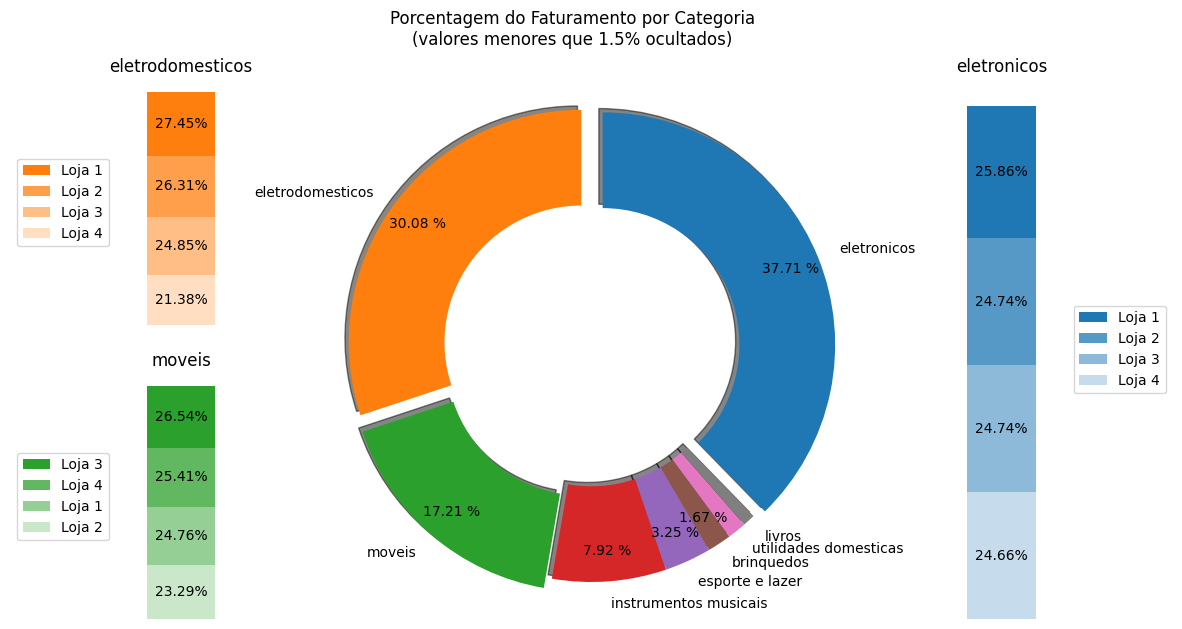

In [26]:
fig1, ax1 = plt.subplots(1, 3, figsize=(15,7))

fig1.suptitle("Porcentagem do Faturamento por Categoria\n(valores menores que 1.5% ocultados)")

ax1[1].pie(
    faturamento_pCategoria['Total'],
    labels=faturamento_pCategoria.index,
    # startangle=-46,
    startangle=90 - faturamento_pCategoria['Total'].iloc[0]/faturamento_pCategoria['Total'].sum() * 360,
    radius=1.7,
    wedgeprops=dict(width=0.7),
    # autopct=lambda pctg: f"{pctg :.2f} %",
    autopct=lambda pctg: f"{pctg :.2f} %" if pctg > 1.5 else "",
    pctdistance=0.87,
    explode=[ (0.09 if n <= 2 else 0) for n in range(len(faturamento_pCategoria.index)) ],
    shadow={'ox': -0.02, 'oy': 0.02, 'edgecolor': 'black', 'shade': 0.9},
    # textprops={'size': 'smaller'},
)

ax1[0].remove()
ax1_0up = fig1.add_subplot(2, 3, 1)
ax1_0dn = fig1.add_subplot(2, 3, 4)

for i,ax in enumerate([ ax1[2], ax1_0up, ax1_0dn ]):

    currBottom = 1
    barWidth = 0.25
    for k, (loja,pctg) in enumerate(faturamentoPctg_pCategoria.iloc[i].sort_values(ascending=False).items()):
        currBottom -= pctg
        barContnr = ax.bar(
            0, pctg,
            width=barWidth,
            bottom=currBottom,
            color=f'C{i}',
            label=loja,
            alpha=1 - 0.25*k
        )
        ax.bar_label(barContnr, labels=[f"{pctg :.2%}"], label_type='center')

    ax.set_title(faturamentoPctg_pCategoria.index[i])
    ax.legend(loc="center left" if i > 0 else 'center right')
    ax.axis('off')
    ax.set_xlim(-2.5*barWidth, 2.5*barWidth)

fig1.show()
# fig1.savefig('Gráfico-1.png')

[Relatório](#scrollTo=Relat_rio)

### Gráfico 2

Quantidade de vendas por Categoria

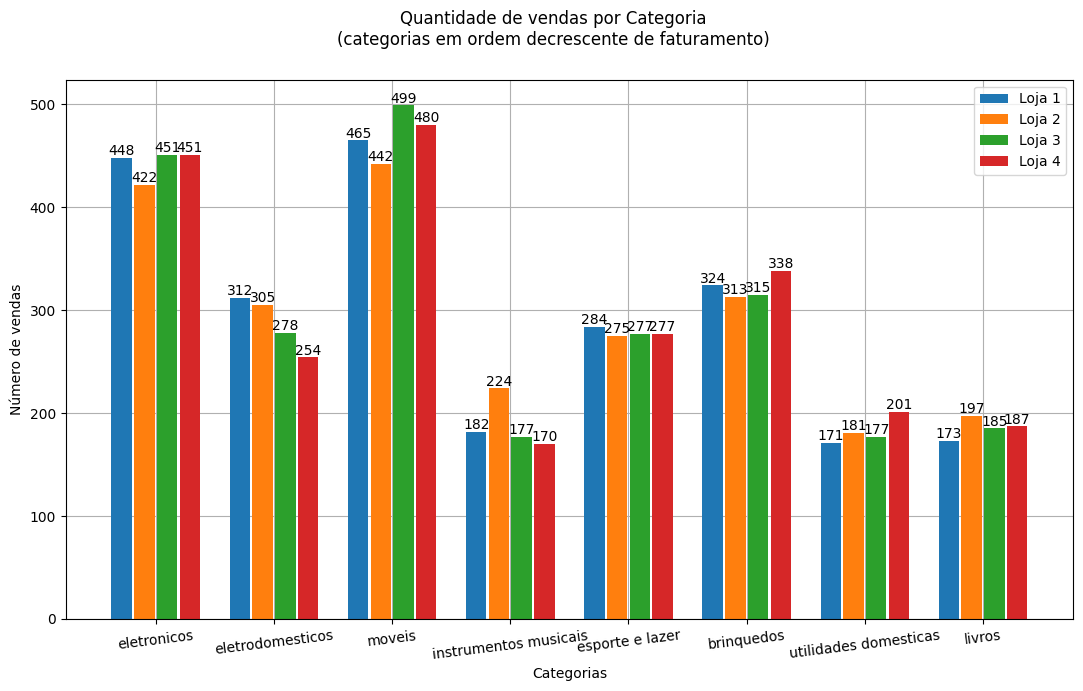

In [27]:
fig2, ax2 = plt.subplots(1,1, figsize=(13,7))

fig2.suptitle("Quantidade de vendas por Categoria\n(categorias em ordem decrescente de faturamento)")

barWidth = 0.25
x = np.arange(len(vendas_pCategoria.index)) * 1.3
for n,loja in enumerate(lojas_str):
    # barContnr = ax2.bar(x + (barWidth * n), vendas_pCategoria[loja].to_numpy(), barWidth*0.9, label=loja)
    barContnr = ax2.bar(x + (barWidth * n), vendas_pCategoria[loja].loc[faturamento_pCategoria.index].to_numpy(), barWidth*0.9, label=loja)
    # ax2.bar_label(barContnr, padding=3)
    ax2.bar_label(barContnr)

ax2.set_ylabel("Número de vendas")

ax2.set_xlabel("Categorias")
# ax2.set_xticks(x + 1.5*barWidth, vendas_pCategoria.index)
ax2.set_xticks(x + 1.5*barWidth, faturamento_pCategoria.index)
ax2.tick_params(axis="x", rotation=7)

ax2.legend()
ax2.grid()
ax2.set_axisbelow(True)

fig2.show()
# fig1.savefig('Gráfico-2.png')

[Relatório](#scrollTo=Relat_rio)

### Gráfico 3

Avaliações por Loja

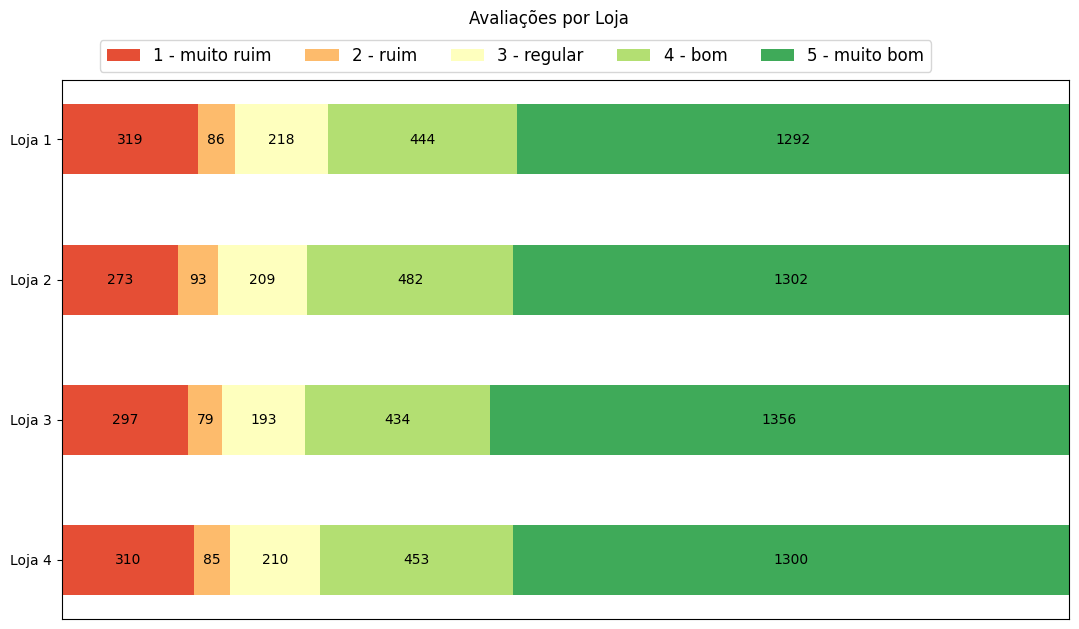

In [28]:
# fig3, (ax3_1,ax3_2,ax3s) = plt.subplots(1,3, figsize=(18,7))
fig3, ax3 = plt.subplots(1,1, figsize=(13,7))

fig3.suptitle("Avaliações por Loja")

# ax3_1.remove()
# ax3_2.remove()
# ax3 = fig3.add_subplot(1,3,(1,2))

aval_colors = plt.colormaps['RdYlGn'](np.linspace(0.15, 0.85, 5))

for loja_s in lojas_str:

    barContnr = ax3.barh(
        loja_s, avaliacao_pLoja[loja_s],
        left=avaliacao_pLoja[loja_s].cumsum() - avaliacao_pLoja[loja_s],
        height=0.5,
        label="1 - muito ruim,2 - ruim,3 - regular,4 - bom,5 - muito bom".split(",") if loja_s == "Loja 1" else None,
        color=aval_colors,
    )

    ax3.bar_label(barContnr, label_type='center', color="black")

ax3.invert_yaxis()

ax3.xaxis.set_visible(False)
ax3.set_xlim(0, avaliacao_pLoja.sum().max())

ax3.legend(
    ncols=5,
    bbox_to_anchor=(0.03, 1),
    loc='lower left',
    fontsize='large',
)

# ax3s.set_title("Média")

# ax3s.errorbar(avaliacao_media.index,avaliacao_media['media'], yerr=avaliacao_media['dp'], barsabove = True)
# ax3s.violinplot(avaliacao_pLoja_all)
# ax3s.boxplot(avaliacao_pLoja_all)

# ax3s.set_ylim(0.9, 5.1)

fig3.show()
# fig1.savefig('Gráfico-3.png')

[Relatório](#scrollTo=Relat_rio)

### Gráfico 4

Preço médio e Produtos mais vendidos

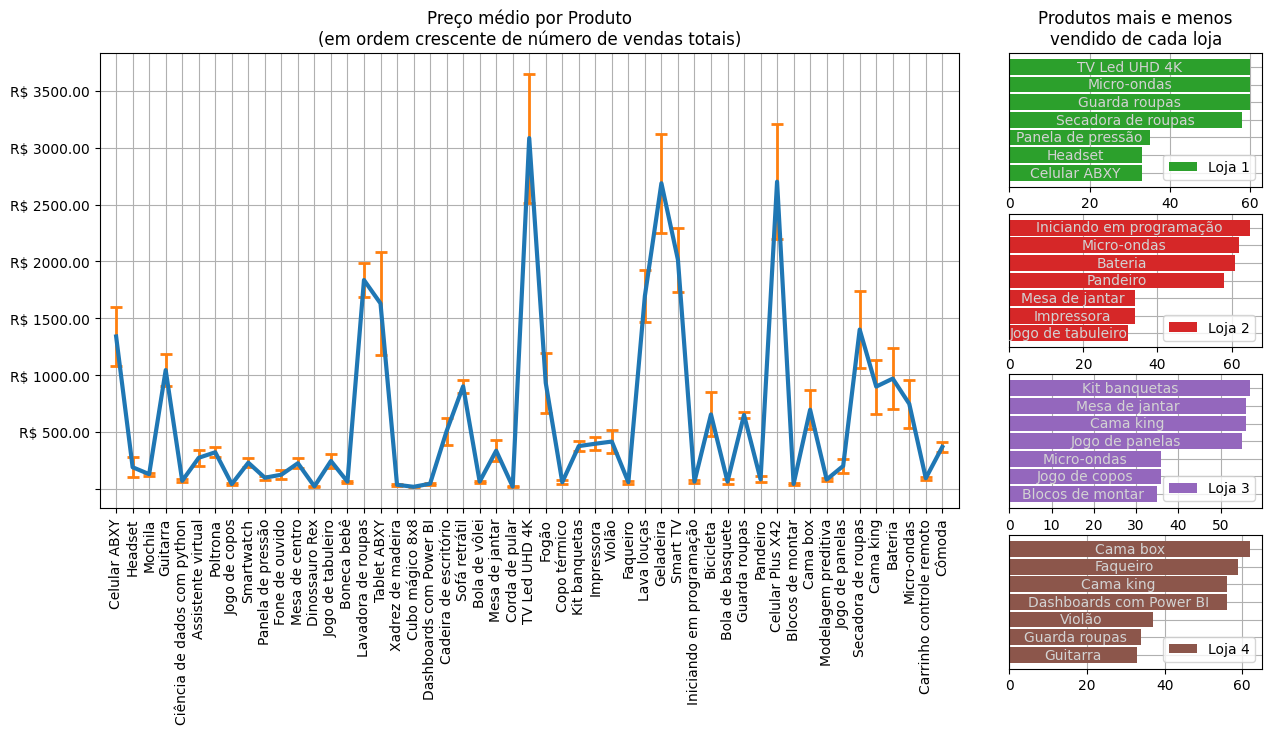

In [29]:
fig4 = plt.figure(figsize=(15,8))

# fig4.suptitle("Preço médio por Produto\n(em ordem crescente de número de vendas totais)")

ax41 = fig4.add_subplot(4,4, (1,11))

ax42 = fig4.add_subplot(444)
ax43 = fig4.add_subplot(448)
ax44 = fig4.add_subplot(4,4, 12)
ax45 = fig4.add_subplot(4,4, 16)

preco_sorted = preco_pProduto.loc[produtos_nVendas['Total'].sort_values().index]

ax41.errorbar(
    preco_sorted.index, preco_sorted["mean"], yerr=preco_sorted["std"],
    ecolor="C1",
    lw=3,
    elinewidth=2,
    capthick=2,
    capsize=4,
    barsabove=False,
)

ax41.set_title("Preço médio por Produto\n(em ordem crescente de número de vendas totais)")
ax41.grid()

ax41.set_xlim(-1, len(preco_sorted.index))
ax41.tick_params(axis="x", labelrotation=90)

# ax41.set_ylabel("Preço (R$)")
# ax41.set_yticklabels( [ f"R$ {t:.2f}" if t>0 else "" for t in ax41.get_yticks()] )
ax41.set_yticks(ax41.get_yticks()[1:-1], labels=[ f"R$ {t:.2f}" if t>0 else "" for t in ax41.get_yticks()[1:-1]] )

for c, (ax,loja_s) in enumerate(zip([ax42,ax43,ax44,ax45],lojas_str), start=2):

    produtos_sorted = produtos_nVendas[loja_s].sort_values().iloc[np.r_[0:3, -4:0]]

    barContnr = ax.barh(produtos_sorted.index, produtos_sorted.values, color=f"C{c}", label=loja_s, height=0.9)

    # ax.bar_label(barContnr, label_type="center", labels=[l + f" ({n})" for l,n in produtos_sorted.items()])
    ax.bar_label(barContnr, label_type="center", labels=produtos_sorted.index, color="lightgray")
    ax.grid()
    ax.set_axisbelow(True)


    # ax.tick_params(axis="x", labelsize="smaller")
    # ax.tick_params(axis='x', bottom=False, labelbottom=False)

    ax.tick_params(axis='y', left=False, labelleft=False)

    ax.legend()


ax42.set_title("Produtos mais e menos\nvendido de cada loja")

# fig4.tight_layout()
fig4.show()
# fig1.savefig('Gráfico-4.png')

## Relatório

### Métricas

Levando em conta que o Senhor João precisa vender uma das 4 lojas da Alura Store para iniciar um novo empreendimento, essa análise se baseia em identificar a loja que irá ter o menor impacto nas vendas, faturamento e avaliação dos clientes.

### Análise

Vemos pelo [Gráfico 1](#scrollTo=Gr_fico_1) que as categorias que mais contribuem para o faturamento total são: **eletrônicos**, **eletrodomésticos** e **móveis**; que somados compõem $85\%$ do faturamento. Dentre essas categorias, a **Loja 4** possui a menor contribuição para o faturamento, estando em último lugar em eletrônicos e eletrodomésticos e em segundo lugar em móveis, contribuindo com $24.66/%$, $21.38\%$ e $25.41\%$ respectivamente. **Loja 2** também fica em último lugar em uma categoria (móveis), com $23.29\%$, mas fica em segundo lugar nas outras duas.

Considerando a quantidade de vendas por categoria, vista no [Gráfico 2](#scrollTo=Gr_fico_2); **Loja 1** teve menos produtos vendidos nas categorias _utilidades domésticas_ e _livros_, as duas categorias com menor impacto no faturamento; **Loja 2** tem menos produtos vendidos nas categorias _eletrônicos_, _móveis_, _esporte e lazer_ e _brinquedos_; **Loja 3** não fica em último em nenhuma das 8 categorias; e **Loja 4** teve menos produtos vendidos nas categorias _eletrodomésticos_ e _instrumentos musicais_. Neste quesito, Lojas 2 e 4 ficam nas piores posições novamente.

Olhando para avaliações dos clientes de cada loja, no [Gráfico 3](#scrollTo=Gr_fico_3), todas as lojas têm médias muito próximas, com variações pequenas; mas dentre elas, as Lojas 2 e 3 ficam na frente: Loja 3 com maior quantidade de notas 5, seguida da Loja 2; e Loja 2 com menor quantidade de notas 1, seguida da Loja 3. Por outro lado, **Loja 1** possui tanto a maior quantidade de notas 1 quanto a menor quantidade de notas 5, seguida da **Loja 4**.

No [Gráfico 4](#scrollTo=Gr_fico_4), vemos que os 4 produtos mais vendidos pelas Lojas 1 não só têm em média preço mais alto que outros produtos, como também estão entre os produtos mais vendidos no geral, o que indica um alto impacto da Loja 1. Já alguns dos produtos mais vendidos pela **Loja 4** (como _Faqueiro_ e _Dashboards com Power BI_) têm valor relativamente baixo e não estão entre os mais vendidos no geral.

### Conclusão

Levando todos esses pontos em consideração, é certo afirmar que a Loja 1, apesar de uma média um pouco mais abaixo que as outras na avaliação dos clientes, possui um alto impacto no geral no faturamento e no número de vendas dos produtos e categorias de produtos mais relevantes. Lojas 2 e 3 ficam mais próximas da média na maioria dessas métricas, com a Loja 2 um pouco mais atrás. Isso deixa a **Loja 4** como a indicada para a venda, de forma a gerar o menor impacto no empreendimento do Seu João.